## Notebook for plotting sum frequencies per year

The code in the current notebook can be used to plot the summed frequency of a certain variable in a dataset per year. 

The queries that can be answered using an adapted version of the following code include but are not limited to:
* Show sum of *frequency* per *origin* per *year* for the least specific level of origin (e.g. EM, Gaul, Italy)
*  Show sum of *frequency* per *origin* per *year* for the specific level of *origin* (e.g., Frejus, Lyon, Switzerland)
* Show sum *frequency* per *contents* per *year*

The plotting of all the above examples can be found in the **RAAD_notebook**

### 1. Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import figure
import numpy as np
import regex as re
sns.set()
import pathlib
from pathlib import Path
import sys
sys.path.append("../src")
from matplotlib.ticker import FormatStrFormatter
from functions import sum_freq_per_year, year_freq_df, plot_graph, preprocess, get_Y_range # module with all functions used for the task

### 2. Read in data

In [2]:
data = pd.read_csv('RAAD_data_restructured.csv', usecols=[
                                                     'site_number', 'RAAD_type_number', 'RAAD_form', 'origin',
                                                     'contents', 'southampton_type_number', 'frequency', 'origin_h1',
                                                     'origin_h2', 'raad_type_start_date', 'raad_type_end_date',
                                                     'site_name_modern', 'site_name_acient', 'modern_country',
                                                     'roman_province', 'lat', 'long', 'major_site_type', 'minor_site_type', 
                                                     'quantification_method', 'quantification_abbreviation','total_assemblage_size'
                                                     ])
data['origin_h2'] = data['origin_h2'].fillna('')

### 3. Prepare data

#### 3.1 Check in which columns numeric values are of an object type
#### 3.2 If found, convert objects into numeric values (float) 
This is essential for performing math operations with these variables

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site_number                  1357 non-null   int64  
 1   RAAD_type_number             1357 non-null   int64  
 2   RAAD_form                    1357 non-null   object 
 3   origin                       1357 non-null   object 
 4   contents                     1354 non-null   object 
 5   southampton_type_number      941 non-null    object 
 6   frequency                    1357 non-null   int64  
 7   origin_h1                    1357 non-null   object 
 8   origin_h2                    915 non-null    object 
 9   raad_type_start_date         1157 non-null   float64
 10  raad_type_end_date           1157 non-null   float64
 11  site_name_modern             1357 non-null   object 
 12  site_name_acient             1008 non-null   object 
 13  modern_country    

#### 3.3 Clean text data (from punctuation, double spaces) and lowercase
This is done in order to avoid inconsistency in names, etc. Thus, to avoid errors while counting

The RAAD dataset is already pre-processed. For this reason, the following cell is commented. 

In [19]:
#data.columns

#cols_for_preprocessing = [
#    'RAAD_form', 
#    'origin', 
#    'contents',
#    'origin_h1', 
#    'origin_h2', 
#    'site_name_modern',
#    'site_name_acient', 
#    'modern_country', 
#    'roman_province',
#    'major_site_type', 
#    'minor_site_type', 
#    'quantification_method',
#    'quantification_abbreviation'
#    ]

#for i in cols_for_preprocessing:
#    data[i] = preprocess(data[i])


#data.head()

### 4. Subset data (Optional)
The code in the following chunks can be used to filter the data according to your wishes.

**Note:** The analysis in the remaining chunks will be done on the subset of the data. If you wish to investigate the full data, do not run the chunks, or make sure the lines are commented out (# in the begining of each line that you do not want to run). If you have created a subset of the data and wish to return to looking into the full data set, run the chunk in section 2 (data = pd.read_csv(.....))

#### 4.1 Subset according to quantification abbreviation
The quntification_abbreviation variable has 4 levels:
* 'total'
* 'max'
* 'mni'
* 'rbh'

Any of these can be inserted below, do only analyse data in which the quantification_abbreviation has a certain value.

In [3]:
# DATA ONLY INCLUDING ONE LEVEL OF QUANTIFICATION ABBREVIATION
#data = data[data['quantification_abbreviation'] == 'max']

# DATA INCLUDING TWO LEVELS OF QUANTIFICATION ABBREVIATION
#data = data[(data['quantification_abbreviation'] == 'max') | (data['quantification_abbreviation'] == 'total')]

#### 4.2 Subset according to major site type
The major_site_type variable has 3 levels:
* 'settlement'
* 'villa'
* 'military'
* 'settlement military'

Any of these can be inserted below, do only analyse data in which the major site type has a certain value.

In [4]:
# DATA ONLY INCLUDING ONE LEVEL OF MAJOR SITE TYPE
#data = data[data['major_site_type'] == 'villa']

# DATA INCLUDING TWO LEVELS OF MAJOR SITE TYPE
#data = data[(data['major_site_type'] == 'villa') | (data['major_site_type'] == 'military')]

#### 4.3 Check that the subsetting worked

It is always a good idea to make sure, that the data includes the wished for elements before moving on. The following code chunks can be used to see which values the columns we used to subset from includes. The head() function can be used to show the first *n* rows of the data.

**NOTE:** When you use the subsetted data to make further analysis in this notebook, make sure that the subsetted data you use, has the specified levels of certain variables you want to plot. For example, you cannot plot the frequency of of `origin_h1` if none of the remaining data has this value. 

In [13]:
# Checking major site type
data['major_site_type'].unique()

array(['settlement military', 'settlement', 'villa', 'military'],
      dtype=object)

In [14]:
# Checking quantification abbreviation
data['quantification_abbreviation'].unique()

array(['total', 'max', 'mni', 'rbh'], dtype=object)

In [3]:
data.head()

,site_number,RAAD_type_number,RAAD_form,origin,contents,southampton_type_number,frequency,origin_h1,origin_h2,raad_type_start_date,...,site_name_acient,modern_country,roman_province,lat,long,major_site_type,minor_site_type,quantification_method,quantification_abbreviation,total_assemblage_size
0,9,1,augst 48,em,unknown,NaN,1,em,,NaN,...,augusta raurica,switzerland,germania superior,47.533512,7.71628,settlement military,colonia limitanei,total sherds,total,5633
1,9,2,augst 49,em,unknown,NaN,1,em,,1.0,...,augusta raurica,switzerland,germania superior,47.533512,7.71628,settlement military,colonia limitanei,total sherds,total,5633
2,9,3,augst 55 agora f6566,em,wine,10,12,em,,-50.0,...,augusta raurica,switzerland,germania superior,47.533512,7.71628,settlement military,colonia limitanei,total sherds,total,5633
3,9,4,augst 56,em,unknown,NaN,2,em,,300.0,...,augusta raurica,switzerland,germania superior,47.533512,7.71628,settlement military,colonia limitanei,total sherds,total,5633
4,9,5,augst 57,em,unknown,NaN,1,em,,400.0,...,augusta raurica,switzerland,germania superior,47.533512,7.71628,settlement military,colonia limitanei,total sherds,total,5633


#### 4.4 Filtering away certain values of data
If for any reason, any data with a specific value in a certain column should be excluded from the analysis, the following code syntax can be used:

```
data = data[data['column_we_want_to_filter_by'] != 'value_it_should_not_have']
```

!= means not equal to. This signifies that we take all rows of the dataframe which does not have the value specified. 


In [7]:
# Example, filtering away all rows where RAAD form is 'unknown'
#data = data[data['RAAD_form'] != 'unknown']

### 5. Create dataframes for plotting
To begin with, the data is grouped by the RAAD types, as well as the variable of interest. This grouping can e.g., be made by origin (both origin_h1 and origin_h2) or contents.

In the below code, only alterations needs to be made in the first line to fit the query. Here it is specified which variable to group by. 


`df0 = data.groupby(['the_name_of_the_variable_you_want_to_group_by', 'RAAD_form', 'raad_type_start_date', 'raad_type_end_date'])['frequency'].sum()`

In [4]:
df0 = data.groupby(['origin_h1', 'RAAD_form', 'raad_type_start_date', 'raad_type_end_date'])['frequency'].sum()
df0 = df0.reset_index()
df0 = df0.rename(columns = {'frequency':'summed_freq'})
df0.head()

,origin_h1,RAAD_form,raad_type_start_date,raad_type_end_date,summed_freq
0,em,ac2,1.0,200.0,1
1,em,augst 46,50.0,100.0,1
2,em,augst 47,150.0,300.0,8
3,em,augst 49,1.0,100.0,1
4,em,augst 55 agora f6566,-50.0,400.0,12


The next chunk calculates the summed frequency per year. No need to alter anything here.

In [5]:
df1 = sum_freq_per_year(data = df0,
                        sum_freq = 'summed_freq',
                        lower_date = 'raad_type_start_date',
                        upper_date = 'raad_type_end_date')

df1.head()

,origin_h1,RAAD_form,raad_type_start_date,raad_type_end_date,summed_freq,Sum_freq_per_year
0,em,ac2,1.0,200.0,1,0.005025
1,em,augst 46,50.0,100.0,1,0.020000
2,em,augst 47,150.0,300.0,8,0.053333
3,em,augst 49,1.0,100.0,1,0.010101
4,em,augst 55 agora f6566,-50.0,400.0,12,0.026667


### 6. Create a dataframe for each level of the variable
This needs to be done for all the levels of the variable that should be included in the final plot. 

If for example, you want three different origins (e.g., EM, Gaul, Italy), three different frequency data frames should be made. 

In the following code, once again, it is only the first line that needs alteration.

`freq_df = year_freq_df(df1[df1[' '] == ' ']`

It is also possible to plot a line, which sums of serveral levels of the variable. This can be done using the following syntax (make sure indentations match):
```
dataframe = year_freq_df(df1[(df1['origin_h1'] == 'em') | (df1['origin_h1'] == 'gaul')], 
                            lower_date = 'raad_type_start_date',
                            upper_date = 'raad_type_end_date',
                            sum_freq = 'Sum_freq_per_year')
```


In [6]:
em = year_freq_df(data = df1[df1['origin_h1'] == 'em'], 
                  lower_date = 'raad_type_start_date',
                  upper_date = 'raad_type_end_date',
                  sum_freq = 'Sum_freq_per_year')

gaul = year_freq_df(data = df1[df1['origin_h1'] == 'gaul'], 
                    lower_date = 'raad_type_start_date',
                    upper_date = 'raad_type_end_date',
                    sum_freq = 'Sum_freq_per_year')

north_africa = year_freq_df(data = df1[df1['origin_h1'] == 'northafrica'], 
                            lower_date = 'raad_type_start_date',
                            upper_date = 'raad_type_end_date',
                            sum_freq = 'Sum_freq_per_year')   


### 7. Plot the graphs

#### 7.1. Create a dictionary for plotting
Now a dictionary containing the above dataframes is made. The keys (what is incapsulated in ' ') are going to be the labels for the plot. The variables refered to, are the dataframes created just above. 

In [7]:
df_dictionary = {'EM': em, 'Gaul': gaul, 'North Africa': north_africa}

In [8]:
df_dictionary2 = {'EM': em, 'Gaul': gaul}

#### 7.2. Plot and save

Here the data from the previously created count data frames are plotted. 

This is done using the function `plotgraph()`. 

To change the colour of lines, pass a list of strings with colour names to `palette` argument. 

To change the default `'solid'` line, pass f.ex., `'dashed'` to `linestyle` argument.o not show 

To hide values on axis uncomment `ax.axes.xaxis.set_ticks([])` for X and `ax.axes.yaxis.set_ticks([])` for Y.

To plot a single line graph specify only 1 axes in this line `fig, ax = plt.subplots(figsize=(20, 11))` and use this `ax` variable as an input for `ax` argument in `plotgraph()`. 
To plot 2 and more graphs side by side:
1. specify that many axes as graphs and the respective number of rows/columns of the subplot grid. F.ex., to plot 2 lie=ne graphs `fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20, 11))`
2. call `plot_graph()` on each `dictionary` and use the respective `ax` variable as an input for `ax` argument in `plotgraph()`.  
F.ex., in `plot_graph(dicts_of_df = df_dictionary, palette=['orange', 'green', 'red], linestyle = 'dashed', ax = ax1)` the line graph for dic with Gaul and Italy will be refered as `ax1` and placed on the **right** side of the graph.

**Note**: Remember to set labels, background colour, etc for both axes like in the example below.

/tmp/ipykernel_37565/145900288.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


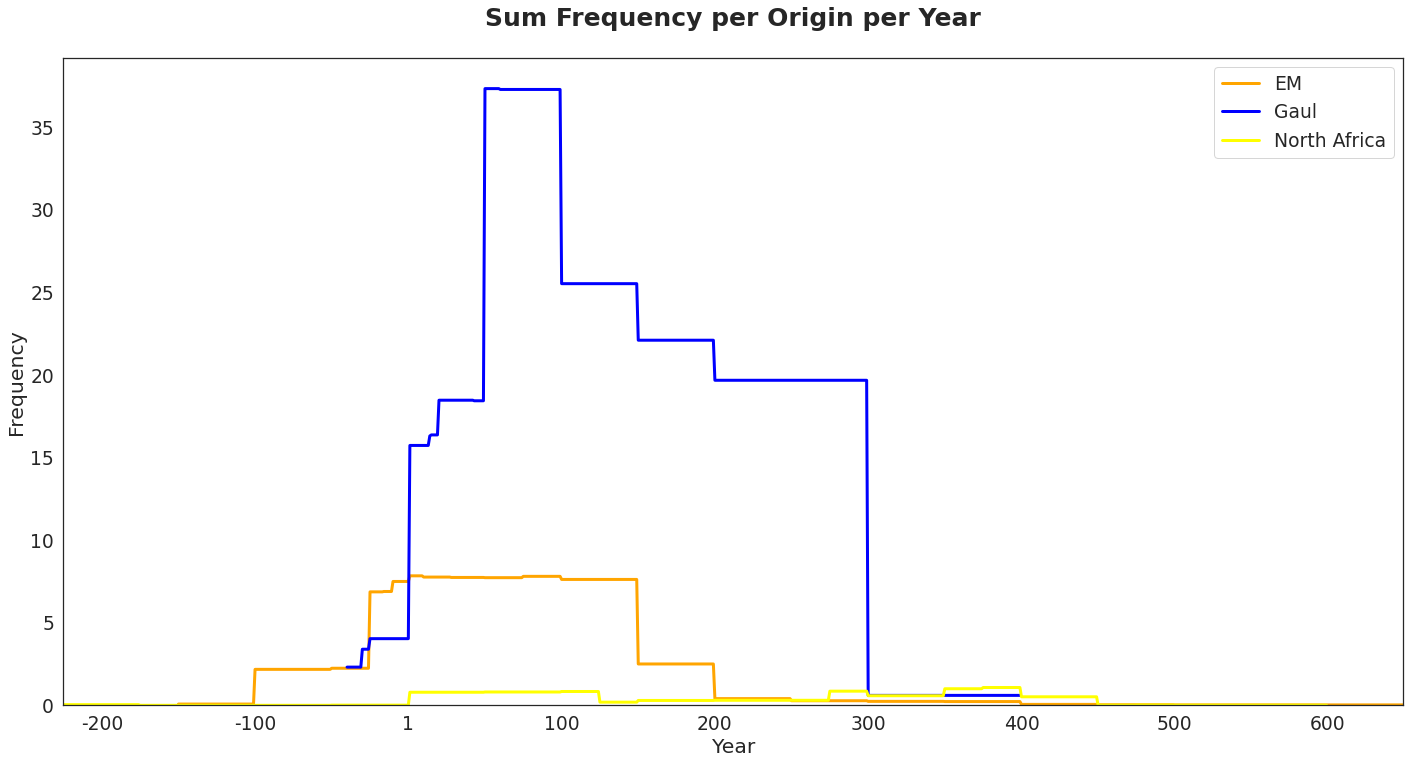

In [11]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['orange', 'blue', 'yellow'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Sum Frequency per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()



# Save the graph
plt.savefig('./Frequency_per_year.pdf')


/tmp/ipykernel_37565/2805945381.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
/tmp/ipykernel_37565/2805945381.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])


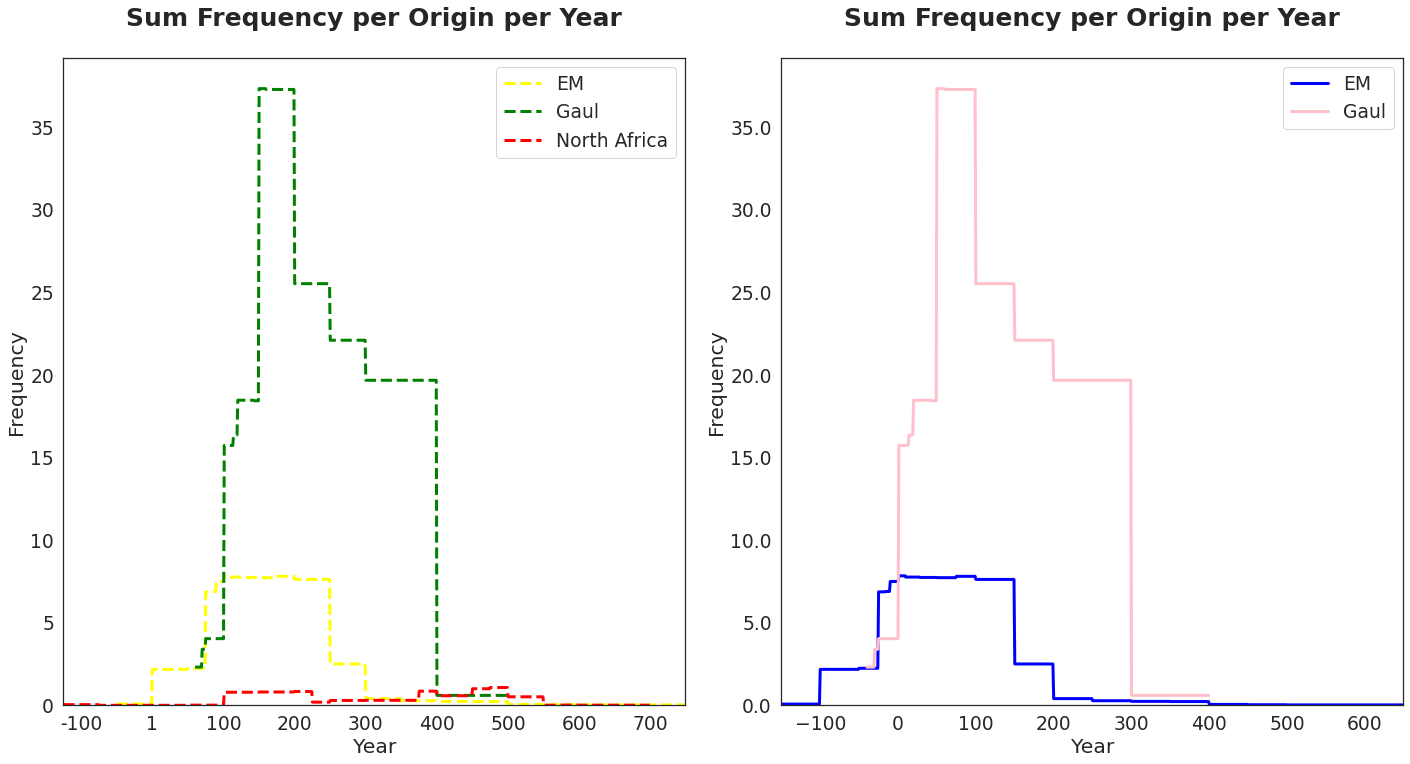

In [12]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

#Calculate minimum and maximum Y values 
minimum1, maximum1 = get_Y_range(df_dictionary)
minimum2, maximum2 = get_Y_range(df_dictionary2)

plot_graph(dicts_of_df = df_dictionary,
           palette=['yellow', 'green', 'red'],
           linestyle = 'dashed',
           ax = ax1)
           

plot_graph(dicts_of_df = df_dictionary2,
            palette=['blue', 'pink'],
            linestyle = 'solid',
            ax = ax2)

# Cut off the range of Y value shown 
ax1.set_xlim(minimum1, maximum1)
ax2.set_xlim(minimum2, maximum2)

# Remove 0 from Y axis
ax1.set_ylim(0, None)
ax2.set_ylim(0, None)

#Change background colour
ax1.set_facecolor("white")  
ax2.set_facecolor("white")

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax1.set_ylabel("Frequency")
ax1.set_xlabel("Year")

ax2.set_xlabel("Year")
ax2.set_ylabel("Frequency")


#To hide values on axis
#ax1.axes.xaxis.set_ticks([])
#ax1.axes.yaxis.set_ticks([])
#ax2.axes.xaxis.set_ticks([])
#ax2.axes.yaxis.set_ticks([])


# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
ax1.set_title(label = 'Sum Frequency per Origin per Year', size=25, y=1.04, fontweight='bold')

ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])
ax2.set_title(label = 'Sum Frequency per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()


# Save the graph
plt.savefig('./Frequency_per_year.pdf')